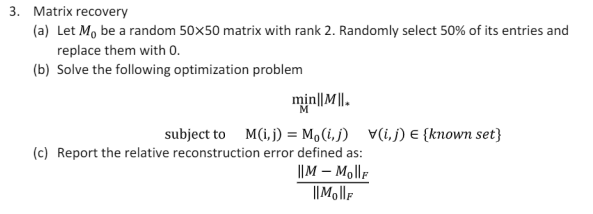

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

As asked in this question, I will take a matrix with many missing values (created by me), and try to re-create it using optimization, in which we should see that the re-created values for the missing values should be very similar to the original matrix. We can use image plotting to see the matrix as an image for ease of analysis

# Part A

First, I create my data as instructed, by creating $M_0$, and then using random numbers to reduce random values of my M0 matrix to 0, thus serving as the "missing data".

In [2]:
np.random.seed(1993)

# Generating original matrix
n1 = 50
n2 = 50
A = np.random.randint(-20,21,size=(n1, n2))
r = 2
u, s, vh = np.linalg.svd(A)
s[r:] = 0
X = (u[:, :n2]*s)@vh
X0 = X.copy() 


mask = np.random.rand(n1, n2) >= 0.5
X[mask] = 0
m = (~mask).sum()

# Part B and C

Next, I perform the process as explained in lecture, and as demonstrated in the sample code. For the optimization problem, we use svd decomposition and maximization to solve for the final values. 

Text(0.5, 1.0, 'Recovered Matrix')

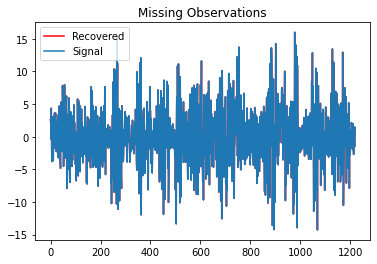

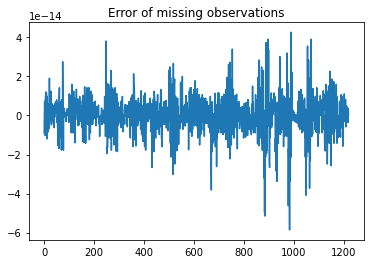

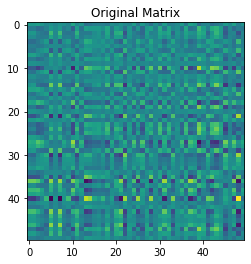

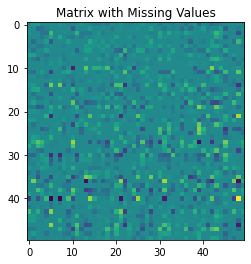

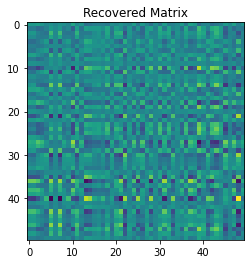

In [3]:
Y = np.zeros((n1, n2))
delta = n1*n2/m
tau = 250

vec = []
err = []
for i in range(500):
    u, s, vh = np.linalg.svd(Y)
    s_t = np.maximum(s-tau, 0)
    Z = (u[:, :n2]*s_t)@vh
    P = X-Z
    P[mask] = 0
    Y0 = Y.copy()
    Y = Y0 + delta*P

    vec.append(((Y-Y0)**2).sum())
    err.append((np.linalg.norm(Z-X0,'fro'))/np.linalg.norm(X0,'fro'))


plt.figure()
Xr = X0[mask]
Zr = Z[mask]
plt.plot(Zr, 'r', label='Recovered')
plt.plot(Xr, label='Signal')

plt.title('Missing Observations')
plt.legend()
plt.figure()
plt.plot(Zr-Xr)
plt.title('Error of missing observations')

plt.figure()
plt.imshow(X0)
plt.title('Original Matrix')

plt.figure()
plt.imshow(X)
plt.title("Matrix with Missing Values")

plt.figure()
plt.imshow(Z)
plt.title('Recovered Matrix')

As can be seen in the line plots, the recovered signal is nearly identical to the original signal, thus showing that the process did an amazing job in fitting in the missing values correctly. 

The error is also plotted in the second graph, which is in the range of 1e-14, which is TINY. 

Finally, in the last three graphs, we can see the original matrix, or "image", the new matrix with the removed values, and finally the recreation. The recreation looks nearly exactly the same, visually! Thus further qualitatively proving that the process seemed to work.

In [4]:
print(f"Final reconstruction error: {(err[-1])}")

Final reconstruction error: 2.4036845503253176e-15
